# Übung 8 - Clusteranalyse

Importiert die Standardpakete.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Lesen Sie die Fortnitedaten ein und schauen sich die ersten Zeilen an.

In [3]:
#df = pd.read_csv("08_Fortnitedaten.csv", encoding = 'ANSI', sep = ";")
df = pd.read_csv("08_Fortnitedaten.csv", sep = ";")
df.head()

,Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type
0,Scar,198.0,36,0,0,5.5,30,1.0,?,2.1,1,31,Legendary,Assault Rifles
1,Scar,192.5,35,0,0,5.5,30,1.0,?,2.1,1,29,Epic,Assault Rifles
2,Scoped Rifle,84.0,24,0,0,3.5,20,1.0,?,2.2,1,29,Epic,Assault Rifles
3,Scoped Rifle,80.5,23,0,0,3.5,20,1.0,?,2.3,1,28,Rare,Assault Rifles
4,M4,181.5,33,0,0,5.5,30,1.0,?,2.2,1,28,Rare,Assault Rifles


## 8.1 Interpretation der Attribte
- **Name** beschreibt den Namen der Waffe, die in Fortnite verwendet werden kann.
- **DPS** steht für "Damage Per Second" und beschreibt den Schaden, den eine Waffe pro Sekunde verursachen kann an einem gegnerischen Spieler.
- **Damage** entspricht dem Schaden, den die Waffe pro Kugel an einem gegnerischen Spieler verursachen kann.
- **Fire Rate** beschreibt die geschwindigkeit pro Sekunde, in der eine Kugel der Waffe abgefeuert werden kann.
- **Mag. Size** steht für die größe des Magazins einer Waffe, die Anzahl an Kugeln die gefeuert werden können, bevor nachgeladen werden muss.
- **Reload** Time stellt dar, wie lange es dauert, bis die Waffe nachgeladen ist.
- **Impact** beschreibt im "Save The World"-Modus wie sehr eine Waffe ein Monster ins taumeln bringen kann. Im "Battle Royal"-Modus hat der Impact keine Auswirkung.

## 8.2 Auswahl der Attribute
Wählen Sie die Attribute "DPS", "Damage", "Fire Rate", "Mag. Size", "Reload Time", "Impact" für das Clustering. Schauen Sie sich die Datentypen an und nehmen Sie ggf. notwendige Datentransformation vor.

In [3]:
df = df[["DPS", "Damage", "Fire Rate", "Mag. Size", "Reload Time", "Impact"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DPS          43 non-null     float64
 1   Damage       43 non-null     int64  
 2   Fire Rate    43 non-null     float64
 3   Mag. Size    43 non-null     int64  
 4   Reload Time  43 non-null     float64
 5   Impact       43 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 2.1 KB


#### 1.4 Normalisierung für Clusteranalyse

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
df.head()

,DPS,Damage,Fire Rate,Mag. Size,Reload Time,Impact
0,0.795421,0.205607,0.352420,0.852941,0.16,0.002759
1,0.768631,0.196262,0.352420,0.852941,0.16,0.001839
2,0.240136,0.093458,0.216087,0.558824,0.18,0.001839
3,0.223088,0.084112,0.216087,0.558824,0.20,0.001379
4,0.715051,0.177570,0.352420,0.852941,0.18,0.001379


## 8.2 Training & Bewertung der Modelle
Ziel ist es drei Cluster in den Daten zu finden und diese optisch ansprechend darzustellen. Nutzen Sie den kMeans Algorithmus für die Clusteranalyse. Wählen Sie als initiale Cluster die ersten drei Datensätze.


#### A1: k-Means-Algorithmus
Die Datenstruktur "init" dient zur Festlegung der initialen Centroide. Bei drei Zielcluster sind daher drei Punkte wichtig.

In [5]:
from sklearn.cluster import KMeans

init = df.loc[:2]
kmeans = KMeans(n_clusters = 3, init = init, max_iter = 99).fit(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


## 8.3 Streudiagramme
Nutzen Sie einen Scatterplot, um die Cluster in jeweils 2 Dimensionen zu visualisieren. Über die Dictionary-Datenstruktur können Farben zugewiesen werden. Testen Sie verschiedene Kombinationen an Merkmalen aus.

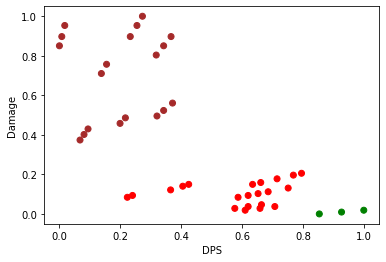

In [6]:
label_color_map = { 0: 'green',
                    1: 'red',
                    2: 'brown'}
label_color = [label_color_map[l] for l in kmeans.labels_]
plt.scatter(df["DPS"], df["Damage"], c = label_color)
x = plt.ylabel("Damage")
y = plt.xlabel("DPS")

## 8.4 Silhouetten-Koeffizient


Berechnen Sie den Silhoutten-Koeffizienten des gesamten Clusterings.

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

print("silhouette_score overall:", silhouette_score(df, kmeans.labels_))

silhouette_score overall: 0.4760829050541078


## 8.5 Interpretation der Ergebnisse
Schauen Sie sich die Ergebnisse des Scatterplots an und versuchen Sie fachliche Interpretationen der Ergbnisse zu finden. Was stellen die Cluster da?

Interpretation der Ergebnisse

Es gibt Waffencluster, deren Waffen wenig Schaden pro Sekunde austeilen (DPS). Dafür ist der Schadensoutput allgemein (Damage) höher (Cluster braun). Dies wären Waffen, die Damage over Time verursachen. Das rote Waffencluster enthält Waffen, die deutlich mehr DPS im Vergleich zu dem Braunen verursachen, aber der Damage an sich ist niedriger. Schließlich gibt es grüne Cluster, welche Waffen mit einem sehr hohen DPS verursachen.

Der Silhouetten-Koeffizient dient als Gütekriterium für die Clusteranalyse. Bei dem Wert von 0,5 ist davon auszugehen, dass eine schwache bis mittlere Strukturierung vorliegt.